In [80]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import MDS
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import calinski_harabasz_score
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
df_cities = pd.read_csv("./../01_LocalAuthorities/lauth-classification-csv.csv")
df_cities["classification"] = df_cities["classification"].str.capitalize()

settlement_types = list(df_cities["classification"].unique())
local_authorities = list(df_cities["localauth_code"].unique())

In [82]:
df = df_cities[["localauth_code", "classification", 'percent_of_localauth']]

df_data = df.pivot(index="localauth_code", columns="classification", values="percent_of_localauth")
df_data = df_data.where(pd.notna(df_data), 0)
df_data

classification,Core city (london),Core city (outside london),Large town,Medium town,Other city,Small town,Village or smaller
localauth_code,,,,,,,
E06000001,0.0,0.0,0.965427,0.000000,0.000000,0.000000,0.034573
E06000002,0.0,0.0,0.000000,0.000000,0.992521,0.000000,0.007479
E06000003,0.0,0.0,0.000000,0.276358,0.275302,0.185556,0.262784
E06000004,0.0,0.0,0.428887,0.310725,0.000000,0.211339,0.049049
E06000005,0.0,0.0,0.874543,0.000000,0.000000,0.000000,0.125457
...,...,...,...,...,...,...,...
W06000020,0.0,0.0,0.000000,0.824947,0.000000,0.098662,0.076392
W06000021,0.0,0.0,0.000000,0.000000,0.000000,0.512133,0.487867
W06000022,0.0,0.0,0.880387,0.000000,0.000000,0.047342,0.072270


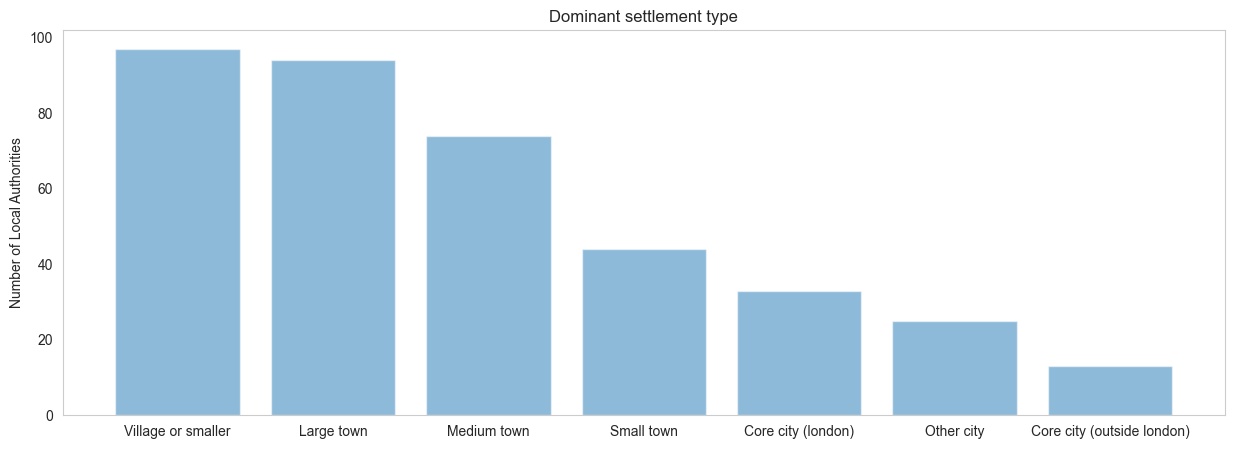

In [83]:
df_temp = df_data.idxmax(axis=1).value_counts()
pos = np.arange(len(df_temp))
fig = plt.figure(figsize=(15,5))
plt.bar(pos, df_temp, align="center", alpha=0.5)
plt.xticks(pos, df_temp.index)
plt.ylabel("Number of Local Authorities")
plt.title("Dominant settlement type")
plt.grid(False)

plt.show()

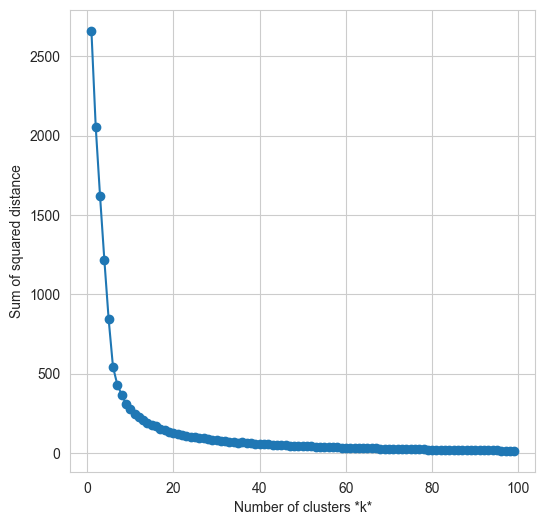

In [84]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_data)

sse = []
list_k = list(range(1, 100))

for k in list_k:
    km = KMeans(n_clusters=k, n_init=15)
    km.fit(scaled_data)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

In [85]:
k_selected = 8

kmeans = KMeans(n_clusters=k_selected, random_state=42, n_init=15)
kmeans.fit(scaled_data)

cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

df_data['cluster'] = cluster_labels

In [87]:
embedding = MDS(n_components=2, normalized_stress='auto')
transformed_data = embedding.fit_transform(df_data[["Core city (london)", "Core city (outside london)", "Large town", "Medium town", "Other city", "Small town", "Village or smaller"]])

In [88]:
df_data["MDS_0"] = transformed_data.transpose()[0].tolist()
df_data["MDS_1"] = transformed_data.transpose()[1].tolist()

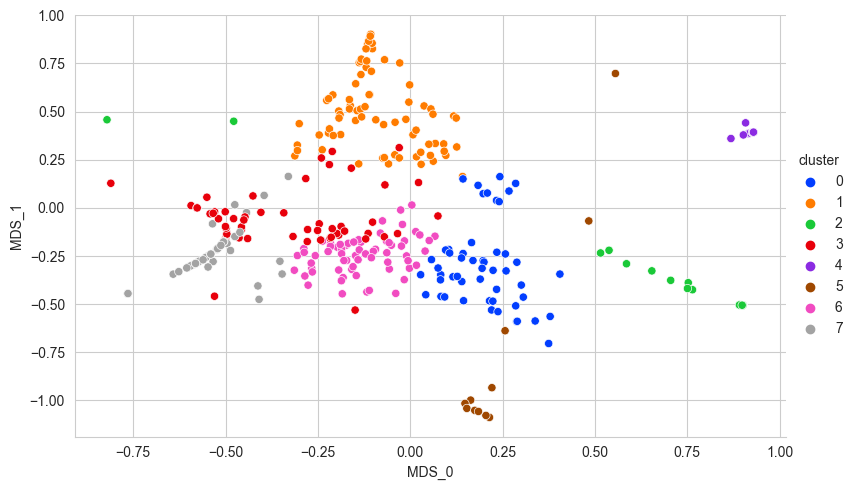

In [89]:
sns.relplot(data=df_data, x='MDS_0', y='MDS_1', hue='cluster', aspect=1.61, palette="bright")
plt.show()

In [90]:
embedding = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3)
transformed_data = embedding.fit_transform(df_data[["Core city (london)", "Core city (outside london)", "Large town", "Medium town", "Other city", "Small town", "Village or smaller"]])
df_data["TSNE_0"] = transformed_data.transpose()[0].tolist()
df_data["TSNE_1"] = transformed_data.transpose()[1].tolist()

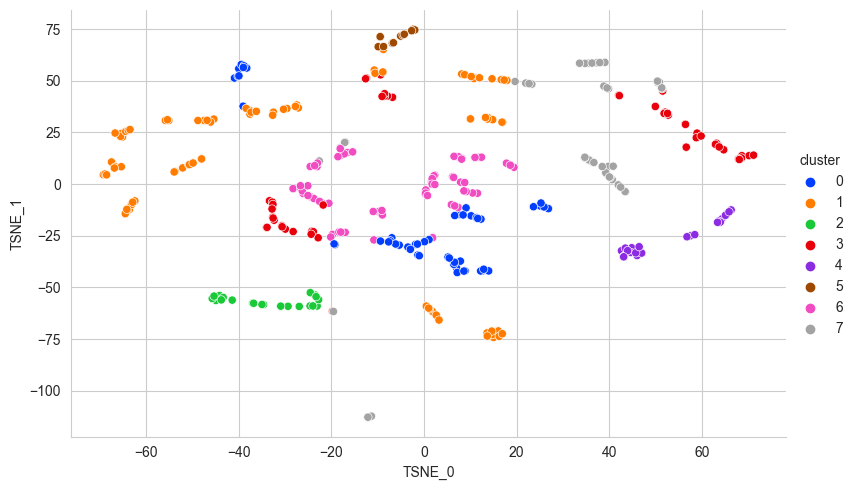

In [91]:
sns.relplot(data=df_data, x='TSNE_0', y='TSNE_1', hue='cluster', aspect=1.61, palette="bright")
plt.show()

In [92]:
pca = PCA(n_components=2)
transformed_data = pca.fit_transform(df_data[["Core city (london)", "Core city (outside london)", "Large town", "Medium town", "Other city", "Small town", "Village or smaller"]])
print(pca.explained_variance_ratio_)

[0.30740657 0.25008657]


In [93]:
df_data["PCA_0"] = transformed_data.transpose()[0].tolist()
df_data["PCA_1"] = transformed_data.transpose()[1].tolist()

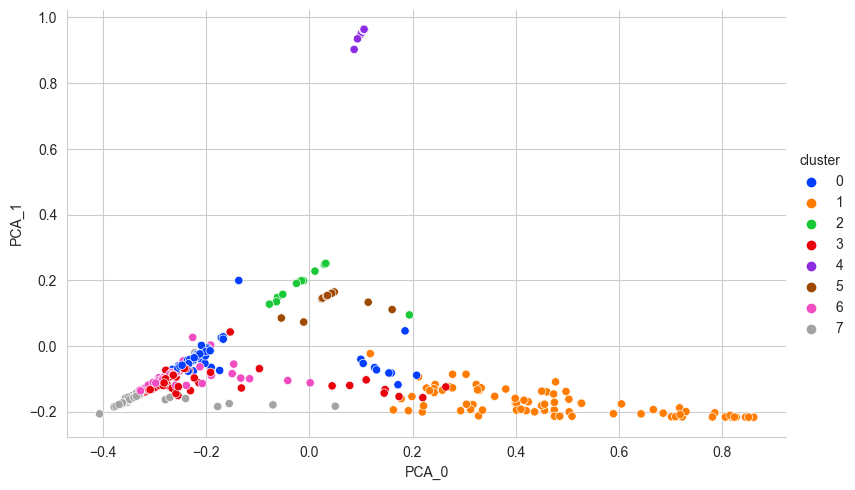

In [94]:
sns.relplot(data=df_data, x='PCA_0', y='PCA_1', hue='cluster', aspect=1.61, palette="bright")
plt.show()

In [95]:
print(calinski_harabasz_score(df_data[["Core city (london)", "Core city (outside london)", "Large town", "Medium town", "Other city", "Small town", "Village or smaller"]], df_data["cluster"]))

352.2895050494596


In [96]:
df_data.groupby(by=["cluster"]).mean()

classification,Core city (london),Core city (outside london),Large town,Medium town,Other city,Small town,Village or smaller,MDS_0,MDS_1,TSNE_0,TSNE_1,PCA_0,PCA_1
cluster,,,,,,,,,,,,,
0,0.008018,0.007624,0.059866,0.646406,0.010904,0.127233,0.139950,0.196761,-0.302030,-1.961335,-13.396435,-0.156794,-0.039845
1,0.000000,0.010635,0.702478,0.081433,0.004189,0.080512,0.120752,-0.090811,0.567134,-26.329340,9.753562,0.523830,-0.179685
2,0.000000,0.000000,0.010101,0.029799,0.898091,0.034880,0.027129,0.689473,-0.369584,-33.494561,-56.502495,0.013265,0.216319
3,0.001232,0.000330,0.063530,0.101379,0.014347,0.480084,0.339098,-0.336290,-0.058478,17.502502,12.070201,-0.205917,-0.109275
4,0.996325,0.000000,0.000000,0.000099,0.000000,0.001812,0.001764,0.924970,0.392381,50.359109,-28.588493,0.104436,0.960070
5,0.000000,0.887736,0.022622,0.046231,0.000692,0.025873,0.016846,0.247975,-0.781008,-5.953786,71.056304,0.040804,0.135952
6,0.001650,0.002564,0.017621,0.347833,0.011140,0.211990,0.407203,-0.128584,-0.244714,-6.074365,-1.364615,-0.263235,-0.097333
7,0.000000,0.000000,0.023588,0.018483,0.011574,0.235413,0.710943,-0.536871,-0.243134,27.905255,13.877912,-0.323146,-0.163886


In [97]:
df_grouped_data = pd.DataFrame(data={
    "Core City": df_data["Core city (outside london)"] + df_data["Core city (london)"],
    "City": df_data["Other city"],
    "Larger Town": df_data["Large town"] + df_data["Medium town"],
    "Smaller Settlements": df_data["Small town"] + df_data["Village or smaller"]
})

In [98]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_grouped_data)

In [46]:
sse = []
ch = []
list_k = list(range(2, 100))

for k in list_k:
    km = KMeans(n_clusters=k, n_init=15)
    km.fit(scaled_data)
    sse.append(km.inertia_)
    ch.append(calinski_harabasz_score(df_grouped_data[["Core City", "City", "Larger Town", "Smaller Settlements"]], km.labels_.transpose()))

# Plot sse against k
#plt.figure(figsize=(6, 6))
#plt.subplot(211)
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

KeyboardInterrupt: 

In [99]:
k_selected = 5

kmeans = KMeans(n_clusters=k_selected, random_state=42, n_init=15)
kmeans.fit(scaled_data)

cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

df_grouped_data['cluster'] = cluster_labels

In [100]:
print(calinski_harabasz_score(df_grouped_data[["Core City", "City", "Larger Town", "Smaller Settlements"]], df_grouped_data["cluster"]))

1208.3368893568033


From above

Cluster 0: Metropolitan LA
Cluster 1: Rural LA with large town
Cluster 2: Cities
Cluster 3: Rural LA
Cluster 4: Towns

0 - 2 - 4 - 1 - 3

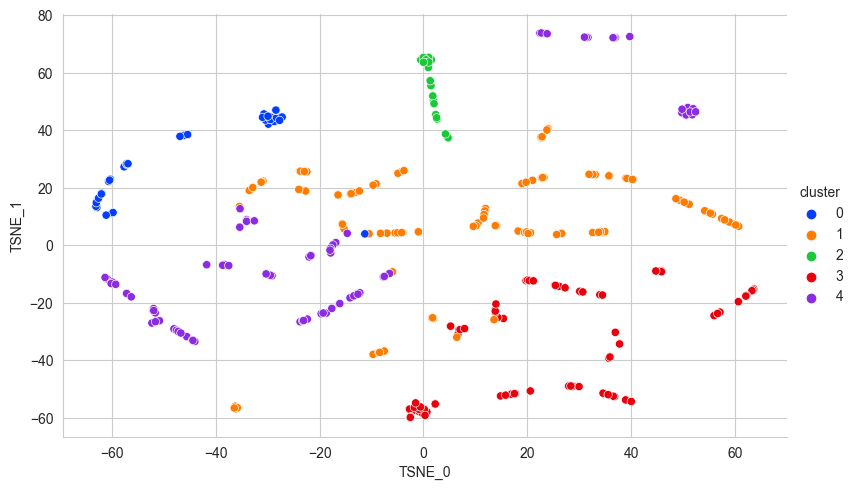

In [55]:
embedding = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3)
transformed_data = embedding.fit_transform(df_grouped_data[["Core City", "City", "Larger Town", "Smaller Settlements"]])
df_grouped_data["TSNE_0"] = transformed_data.transpose()[0].tolist()
df_grouped_data["TSNE_1"] = transformed_data.transpose()[1].tolist()
sns.relplot(data=df_grouped_data, x='TSNE_0', y='TSNE_1', hue='cluster', aspect=1.61, palette="bright")
plt.show()

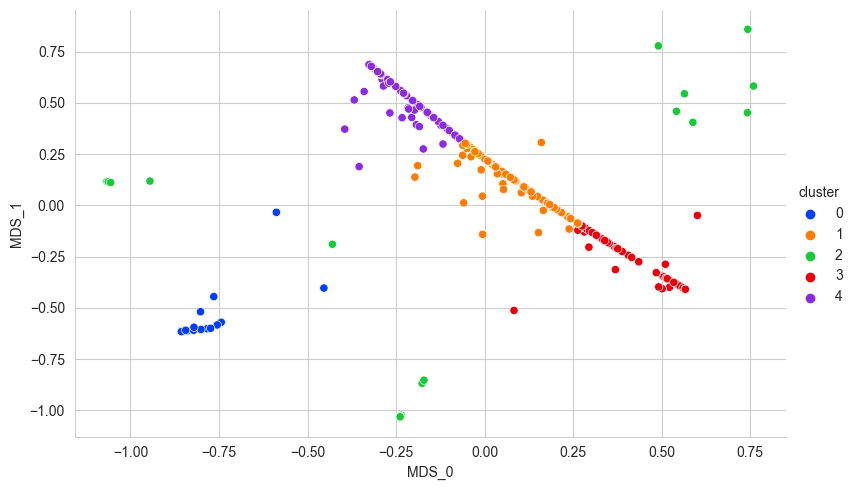

In [56]:
embedding = MDS(n_components=2, normalized_stress='auto')
transformed_data = embedding.fit_transform(df_grouped_data[["Core City", "City", "Larger Town", "Smaller Settlements"]])
df_grouped_data["MDS_0"] = transformed_data.transpose()[0].tolist()
df_grouped_data["MDS_1"] = transformed_data.transpose()[1].tolist()
sns.relplot(data=df_grouped_data, x='MDS_0', y='MDS_1', hue='cluster', aspect=1.61, palette="bright")
plt.show()

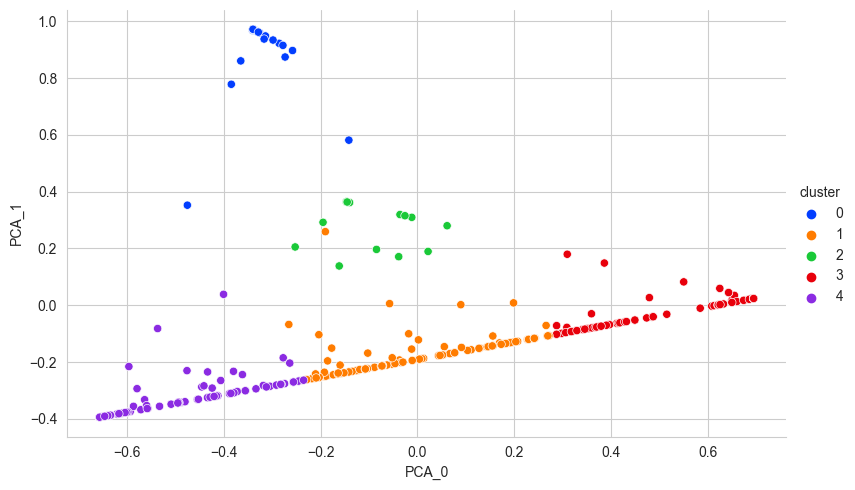

In [57]:
embedding = PCA(n_components=2)
transformed_data = embedding.fit_transform(df_grouped_data[["Core City", "City", "Larger Town", "Smaller Settlements"]])
df_grouped_data["PCA_0"] = transformed_data.transpose()[0].tolist()
df_grouped_data["PCA_1"] = transformed_data.transpose()[1].tolist()
sns.relplot(data=df_grouped_data, x='PCA_0', y='PCA_1', hue='cluster', aspect=1.61, palette="bright")
plt.show()

In [58]:
df_ghg = pd.read_csv("./Data/UK_LA_GHG_EMISSIONS.csv")

boolean_mask1 = (df_ghg["LA GHG Sector"] == "Transport")
boolean_mask2 = (df_ghg["LA GHG Sub-sector"] == "Road Transport (A roads)")
boolean_mask3 = (df_ghg["Greenhouse gas"] == "CO2")

df_ghg = df_ghg[boolean_mask1 & boolean_mask2 & boolean_mask3]
df_ghg.reset_index(inplace=True)

year_condition = (df_ghg["Calendar Year"] == 2018)

df_ghg_2018 = df_ghg[year_condition]
df_ghg_2018.reset_index(inplace=True)

df_merged_2018 = df_ghg_2018.merge(df_grouped_data, how="inner", left_on="Local Authority Code", right_index=True)

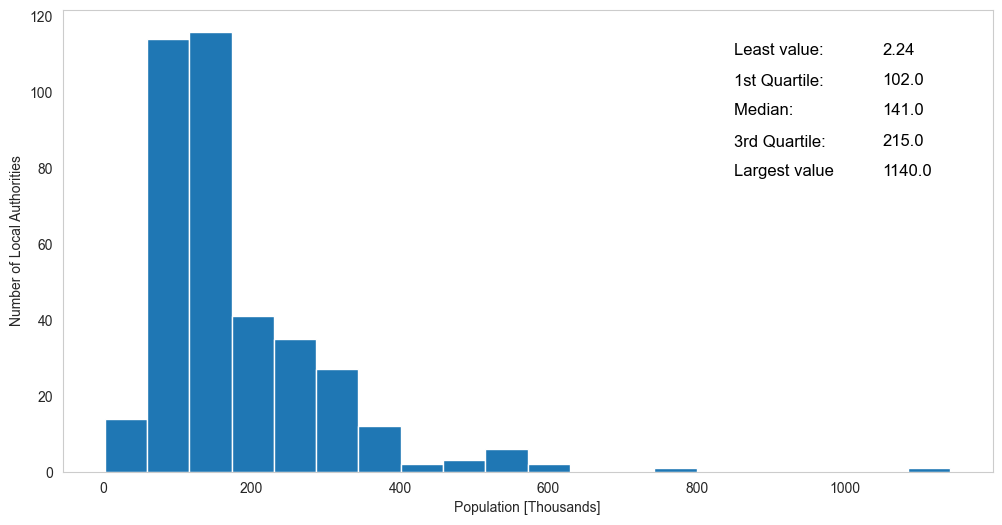

In [163]:
fig = plt.figure(1, figsize=(12, 6))
ax = fig.add_subplot(111)

ax.hist(df_ghg_2018["Mid-year Population (thousands)"], bins=20)
ax.set_xlabel("Population [Thousands]")
ax.set_ylabel("Number of Local Authorities")

quantiles = np.quantile(df_ghg_2018["Mid-year Population (thousands)"], np.array([0.00, 0.25, 0.50, 0.75, 1.00]))
ax.vlines(quantiles, [0] * quantiles.size, [1] * quantiles.size,
          color='b', ls=':', lw=0.5, zorder=0)

ax.text(850, 110, "Least value: ", {'color': '00', 'fontsize': 12})
ax.text(1050, 110, round(quantiles[0],2), {'color': '00', 'fontsize': 12})
ax.text(850, 102, "1st Quartile: ", {'color': '00', 'fontsize': 12})
ax.text(1050, 102, round(quantiles[1],0), {'color': '00', 'fontsize': 12})
ax.text(850, 94, "Median: ", {'color': '00', 'fontsize': 12})
ax.text(1050, 94, round(quantiles[2], 0), {'color': '00', 'fontsize': 12})
ax.text(850, 86, "3rd Quartile: ", {'color': '00', 'fontsize': 12})
ax.text(1050, 86, round(quantiles[3],0), {'color': '00', 'fontsize': 12})
ax.text(850, 78, "Largest value ", {'color': '00', 'fontsize': 12})
ax.text(1050, 78, round(quantiles[4],-1), {'color': '00', 'fontsize': 12})
ax.grid(False)
plt.show()

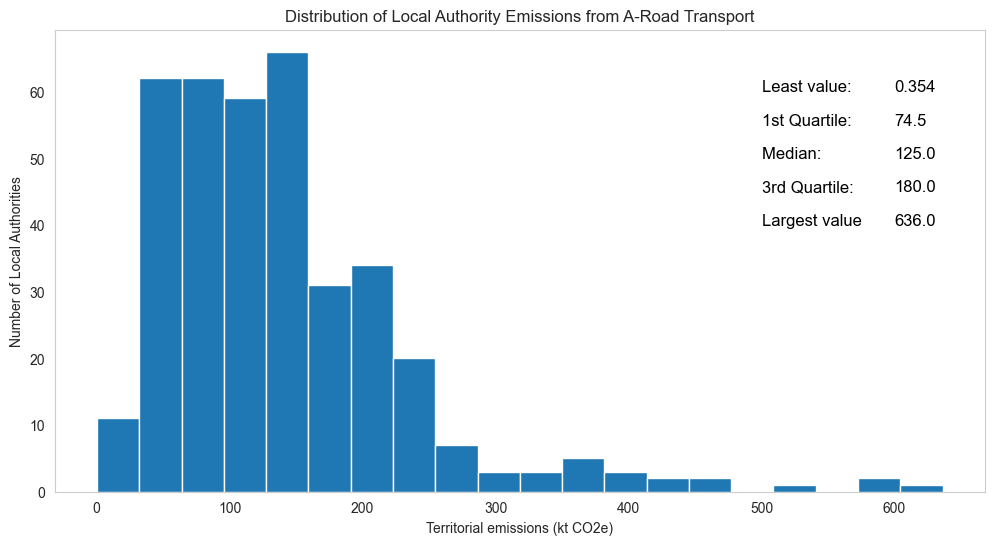

In [172]:
fig = plt.figure(1, figsize=(12, 6))
ax = fig.add_subplot(111)

ax.hist(df_ghg_2018["Territorial emissions (kt CO2e)"], bins=20)
ax.set_xlabel("Territorial emissions (kt CO2e)")
ax.set_ylabel("Number of Local Authorities")
ax.set_title("Distribution of Local Authority Emissions from A-Road Transport")

quantiles = np.quantile(df_ghg_2018["Territorial emissions (kt CO2e)"], np.array([0.00, 0.25, 0.50, 0.75, 1.00]))
ax.vlines(quantiles, [0] * quantiles.size, [1] * quantiles.size,
          color='b', ls=':', lw=0.5, zorder=0)

ax.text(500, 60, "Least value: ", {'color': '00', 'fontsize': 12})
ax.text(600, 60, round(quantiles[0],3), {'color': '00', 'fontsize': 12})
ax.text(500, 55, "1st Quartile: ", {'color': '00', 'fontsize': 12})
ax.text(600, 55, round(quantiles[1],1), {'color': '00', 'fontsize': 12})
ax.text(500, 50, "Median: ", {'color': '00', 'fontsize': 12})
ax.text(600, 50, round(quantiles[2], 0), {'color': '00', 'fontsize': 12})
ax.text(500, 45, "3rd Quartile: ", {'color': '00', 'fontsize': 12})
ax.text(600, 45, round(quantiles[3],0), {'color': '00', 'fontsize': 12})
ax.text(500, 40, "Largest value ", {'color': '00', 'fontsize': 12})
ax.text(600, 40, round(quantiles[4],0), {'color': '00', 'fontsize': 12})
ax.grid(False)
plt.show()

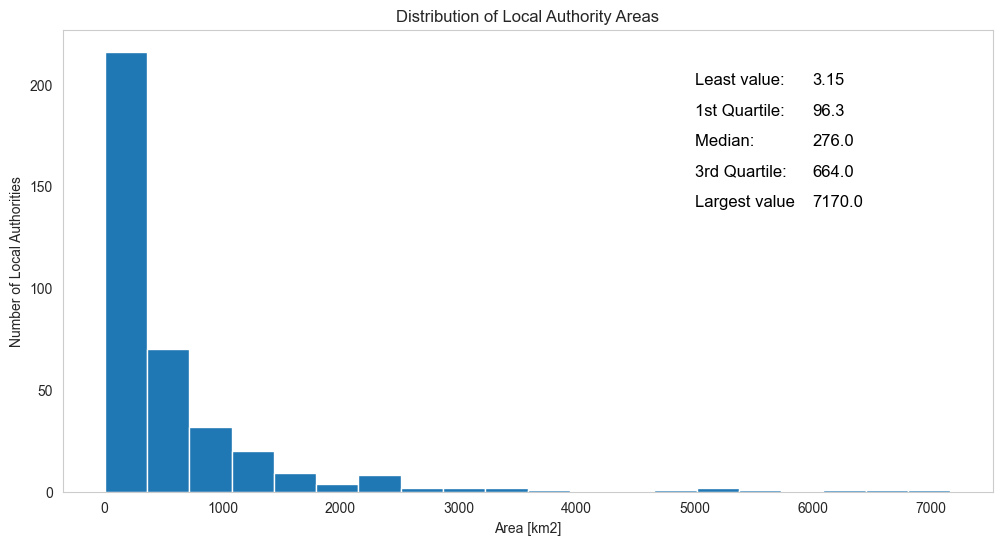

In [160]:
fig = plt.figure(1, figsize=(12, 6))
ax = fig.add_subplot(111)

ax.hist(df_ghg_2018[df_ghg_2018["Area (km2)"] < 25000]["Area (km2)"], bins=20)
ax.set_xlabel("Area [km2]")
ax.set_ylabel("Number of Local Authorities")
ax.set_title("Distribution of Local Authority Areas")

quantiles = np.quantile(df_ghg_2018[df_ghg_2018["Area (km2)"] < 25000]["Area (km2)"], np.array([0.00, 0.25, 0.50, 0.75, 1.00]))
ax.vlines(quantiles, [0] * quantiles.size, [1] * quantiles.size,
          color='b', ls=':', lw=0.5, zorder=0)

ax.text(5000, 200, "Least value: ", {'color': '00', 'fontsize': 12})
ax.text(6000, 200, round(quantiles[0],2), {'color': '00', 'fontsize': 12})
ax.text(5000, 185, "1st Quartile: ", {'color': '00', 'fontsize': 12})
ax.text(6000, 185, round(quantiles[1],1), {'color': '00', 'fontsize': 12})
ax.text(5000, 170, "Median: ", {'color': '00', 'fontsize': 12})
ax.text(6000, 170, round(quantiles[2], 0), {'color': '00', 'fontsize': 12})
ax.text(5000, 155, "3rd Quartile: ", {'color': '00', 'fontsize': 12})
ax.text(6000, 155, round(quantiles[3],0), {'color': '00', 'fontsize': 12})
ax.text(5000, 140, "Largest value ", {'color': '00', 'fontsize': 12})
ax.text(6000, 140, round(quantiles[4],-1), {'color': '00', 'fontsize': 12})
ax.grid(False)
plt.show()

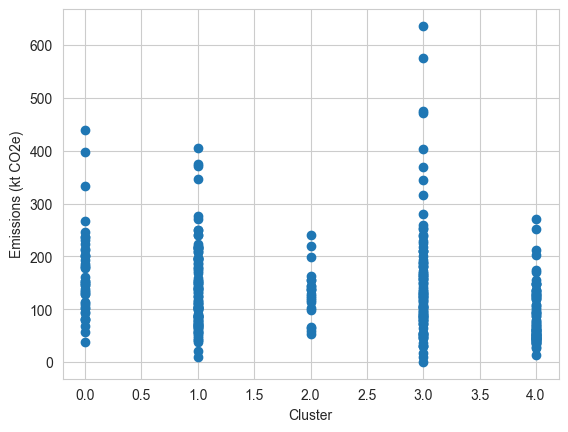

In [224]:
plt.scatter(list(df_merged_2018["cluster"]), list(df_merged_2018["Territorial emissions (kt CO2e)"]))
plt.xlabel("Cluster")
plt.ylabel("Emissions (kt CO2e)")
plt.show()

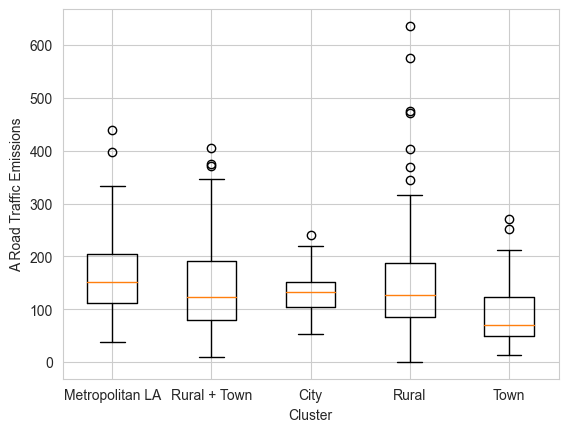

In [63]:
df_0 = df_merged_2018[df_merged_2018["cluster"]==0]
data_cluster_0 = df_0["Territorial emissions (kt CO2e)"]/df_0[""]
data_cluster_1 = df_merged_2018[df_merged_2018["cluster"]==1]["Territorial emissions (kt CO2e)"]
data_cluster_2 = df_merged_2018[df_merged_2018["cluster"]==2]["Territorial emissions (kt CO2e)"]
data_cluster_3 = df_merged_2018[df_merged_2018["cluster"]==3]["Territorial emissions (kt CO2e)"]
data_cluster_4 = df_merged_2018[df_merged_2018["cluster"]==4]["Territorial emissions (kt CO2e)"]

plt.boxplot([data_cluster_0, data_cluster_1, data_cluster_2, data_cluster_3, data_cluster_4], labels=["Metropolitan LA", "Rural + Town", "City", "Rural", "Town"])
plt.ylabel("A Road Traffic Emissions")
plt.xlabel("Cluster")
plt.show()

In [69]:
df_traffic = pd.read_csv("./Data/local_authority_traffic.csv")
df_gdp = pd.read_csv("./Data/GDP_by_LA.csv", skiprows=1, thousands=",")

df_all_data = df_merged_2018.merge(df_traffic, how="inner", left_on="Local Authority Code", right_on="ONS_code")
df_all_data = df_all_data.merge(df_gdp, how="inner", left_on="Local Authority Code", right_on="LA code")

year_condition = (df_all_data["year"] == 2018)
df_all_data = df_all_data[year_condition]

df_enhanced_data = pd.DataFrame(data={
    "LA Code": df_all_data["Local Authority Code"],
    "LA Name": df_all_data["Local Authority"],
    "City": df_all_data["Core City"] + df_all_data["City"],
    "Larger Town": df_all_data["Larger Town"],
    "Road Length": df_all_data["link_length_km"],
    "GDP": df_all_data["2018"],
    "Population": df_all_data["Mid-year Population (thousands)"],
    "GHG Emissions": df_all_data["Territorial emissions (kt CO2e)"],
    "Area": df_all_data["Area (km2)"],
    "cluster": df_all_data["cluster"]
})

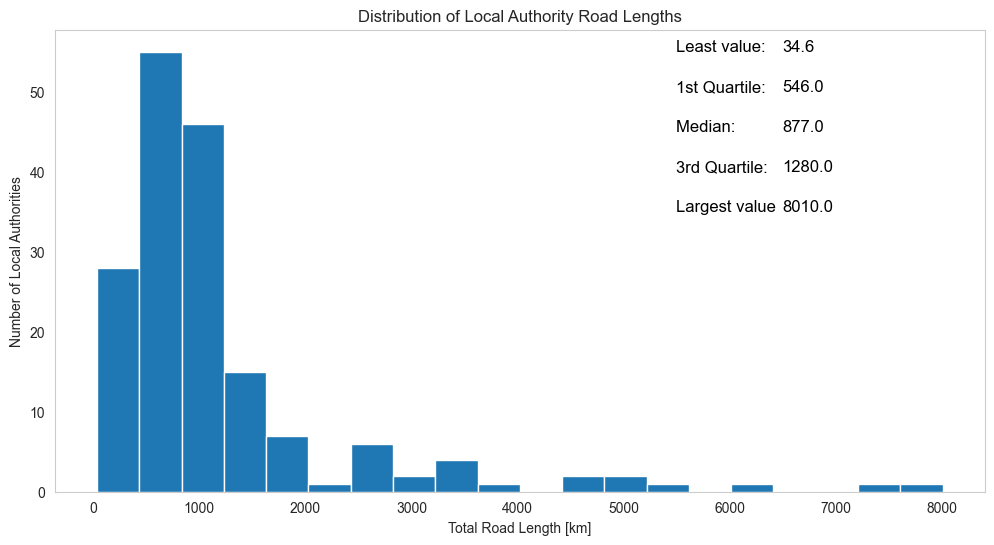

In [180]:
fig = plt.figure(1, figsize=(12, 6))
ax = fig.add_subplot(111)

ax.hist(df_enhanced_data["Road Length"], bins=20)
ax.set_xlabel("Total Road Length [km]")
ax.set_ylabel("Number of Local Authorities")
ax.set_title("Distribution of Local Authority Road Lengths")

quantiles = np.quantile(df_enhanced_data["Road Length"], np.array([0.00, 0.25, 0.50, 0.75, 1.00]))
ax.vlines(quantiles, [0] * quantiles.size, [1] * quantiles.size,
          color='b', ls=':', lw=0.5, zorder=0)

ax.text(5500, 55, "Least value: ", {'color': '00', 'fontsize': 12})
ax.text(6500, 55, round(quantiles[0],1), {'color': '00', 'fontsize': 12})
ax.text(5500, 50, "1st Quartile: ", {'color': '00', 'fontsize': 12})
ax.text(6500, 50, round(quantiles[1],0), {'color': '00', 'fontsize': 12})
ax.text(5500, 45, "Median: ", {'color': '00', 'fontsize': 12})
ax.text(6500, 45, round(quantiles[2], 0), {'color': '00', 'fontsize': 12})
ax.text(5500, 40, "3rd Quartile: ", {'color': '00', 'fontsize': 12})
ax.text(6500, 40, round(quantiles[3],-1), {'color': '00', 'fontsize': 12})
ax.text(5500, 35, "Largest value ", {'color': '00', 'fontsize': 12})
ax.text(6500, 35, round(quantiles[4],-1), {'color': '00', 'fontsize': 12})
ax.grid(False)
plt.show()

In [71]:
df_enhanced_data.set_index("LA Code", drop=True, inplace=True)
df_enhanced_data

,LA Name,City,Larger Town,Road Length,GDP,Population,GHG Emissions,Area,cluster
LA Code,,,,,,,,,
E06000015,Derby,1.000000,0.000000,771.8626,8055,257.174,163.102372,78.0311,2
E06000016,Leicester,0.998524,0.000000,829.7238,9517,355.218,155.314654,73.3421,2
E06000018,Nottingham,0.906749,0.022267,808.7184,11147,331.069,185.100695,74.6132,0
E06000017,Rutland,0.000000,0.000000,557.5542,954,39.697,122.314443,393.7490,3
E06000055,Bedford,0.000000,0.552844,924.3472,4656,171.623,185.029518,476.4082,1
...,...,...,...,...,...,...,...,...,...
W06000016,Rhondda Cynon Taf,0.000000,0.258134,1208.6423,4949,240.131,224.670475,424.1502,3
W06000011,Swansea,0.752901,0.000000,1168.4329,6319,246.466,121.581797,420.8260,2
W06000020,Torfaen,0.000000,0.824947,478.7708,1888,93.049,61.122965,126.2401,4


In [217]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_enhanced_data[["City", "Larger Town", "Population", "GDP", "Road Length"]])

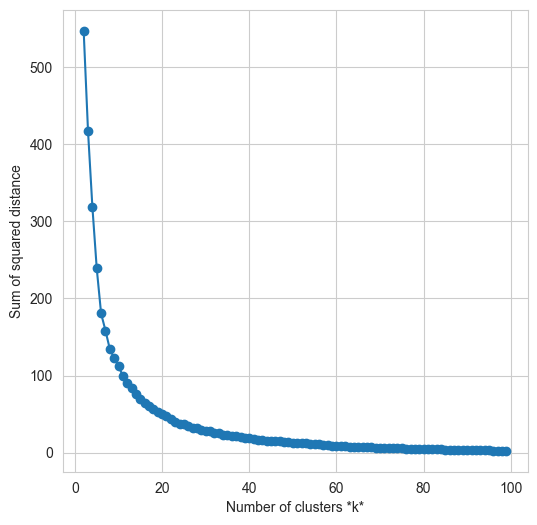

In [35]:
sse = []
list_k = list(range(2, 100))

for k in list_k:
    km = KMeans(n_clusters=k, n_init=15)
    km.fit(scaled_data)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

In [218]:
k_selected = 7

kmeans = KMeans(n_clusters=k_selected, random_state=42, n_init=15)
kmeans.fit(scaled_data)

cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

df_enhanced_data['cluster'] = cluster_labels

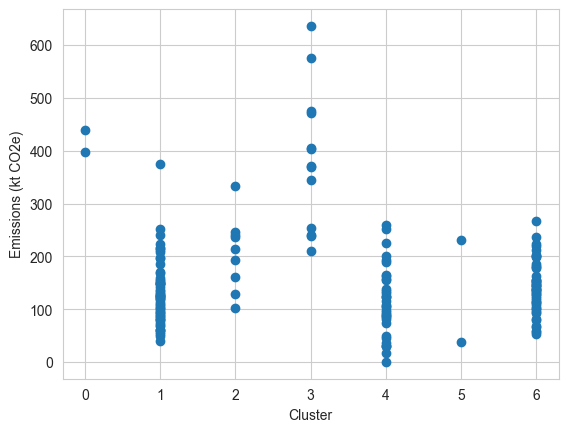

In [219]:
plt.scatter(list(df_enhanced_data["cluster"]), list(df_enhanced_data["GHG Emissions"]))
plt.xlabel("Cluster")
plt.ylabel("Emissions (kt CO2e)")
plt.show()

In [220]:
print(calinski_harabasz_score(df_enhanced_data[["City", "Larger Town", "Population", "GDP", "Road Length"]], df_enhanced_data["cluster"]))

179.2963001931028


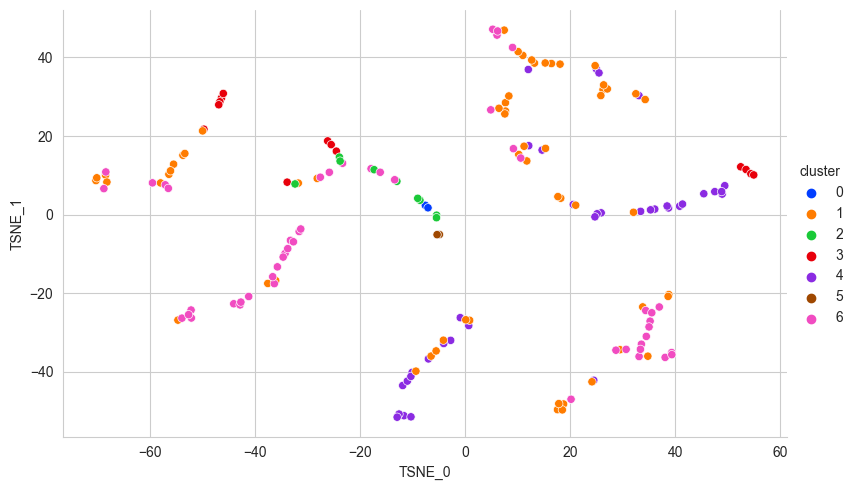

In [221]:
embedding = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3)
transformed_data = embedding.fit_transform(df_enhanced_data[["City", "Larger Town", "Road Length", "GDP", "Population"]])
df_enhanced_data["TSNE_0"] = transformed_data.transpose()[0].tolist()
df_enhanced_data["TSNE_1"] = transformed_data.transpose()[1].tolist()
sns.relplot(data=df_enhanced_data, x='TSNE_0', y='TSNE_1', hue='cluster', aspect=1.61, palette="bright")
plt.show()

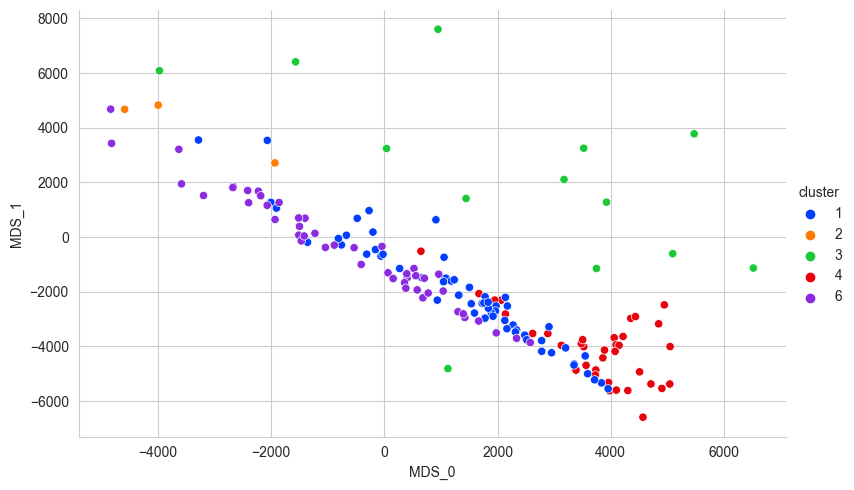

In [222]:
embedding = MDS(n_components=2, normalized_stress='auto')
transformed_data = embedding.fit_transform(df_enhanced_data[["City", "Larger Town", "Road Length", "GDP", "Population"]])
df_enhanced_data["MDS_0"] = transformed_data.transpose()[0].tolist()
df_enhanced_data["MDS_1"] = transformed_data.transpose()[1].tolist()
df_tmp = df_enhanced_data[(df_enhanced_data["MDS_0"] > -5000) & (df_enhanced_data["MDS_0"] < 30000)]
sns.relplot(data=df_tmp, x='MDS_0', y='MDS_1', hue='cluster', aspect=1.61, palette="bright")
plt.show()

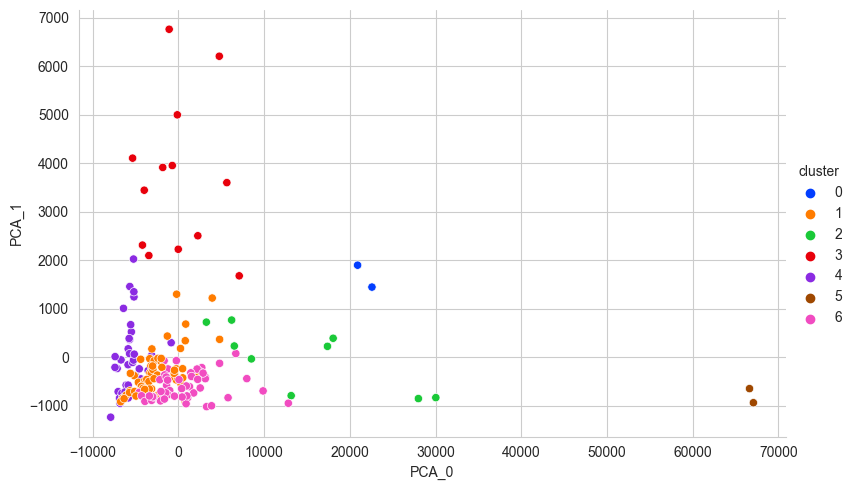

In [223]:
embedding = PCA(n_components=2)
transformed_data = embedding.fit_transform(df_enhanced_data[["City", "Larger Town", "Road Length", "GDP", "Population"]])
df_enhanced_data["PCA_0"] = transformed_data.transpose()[0].tolist()
df_enhanced_data["PCA_1"] = transformed_data.transpose()[1].tolist()
sns.relplot(data=df_enhanced_data, x='PCA_0', y='PCA_1', hue='cluster', aspect=1.61, palette="bright")
plt.show()

In [210]:
df_temp = df_enhanced_data
df_temp["Urban Population"] = df_temp["City"] + df_temp["Larger Town"]

df_temp = df_temp[(df_temp["Area"] < 125)]
#df_temp = df_temp[(df_temp["Urban Population"] < 0.948)]

df_temp.sort_values(["Urban Population"], inplace=True)

df_temp[["LA Name", "cluster", "GHG Emissions"]]

C:\Users\elias\AppData\Local\Temp\ipykernel_43528\3439125884.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp.sort_values(["Urban Population"], inplace=True)


,LA Name,cluster,GHG Emissions
LA Code,,,
E06000053,Isles of Scilly,Rural LA,0.353978
W06000019,Blaenau Gwent,Rural LA,49.699107
E06000036,Bracknell Forest,Town,74.002483
E08000008,Tameside,Town,87.421728
W06000024,Merthyr Tydfil,Town,60.946205
...,...,...,...
E09000007,Camden,Metropolitan LA,102.001896
E06000044,Portsmouth,City,101.688178
E09000005,Brent,Metropolitan LA,134.143725


In [211]:
df_temp["cluster"].replace(0, "Metropolitan LA", inplace=True)
df_temp["cluster"].replace(1, "Rural LA with Large Town", inplace=True)
df_temp["cluster"].replace(2, "City", inplace=True)
df_temp["cluster"].replace(3, "Rural LA", inplace=True)
df_temp["cluster"].replace(4, "Town", inplace=True)

df_temp[["LA Name", "Area"]]

C:\Users\elias\AppData\Local\Temp\ipykernel_43528\1266665586.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp["cluster"].replace(0, "Metropolitan LA", inplace=True)
C:\Users\elias\AppData\Local\Temp\ipykernel_43528\1266665586.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp["cluster"].replace(1, "Rural LA with Large Town", inplace=True)
C:\Users\elias\AppData\Local\Temp\ipykernel_43528\1266665586.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

,LA Name,Area
LA Code,,
E06000053,Isles of Scilly,22.8495
W06000019,Blaenau Gwent,108.7279
E06000036,Bracknell Forest,109.3843
E08000008,Tameside,103.1543
W06000024,Merthyr Tydfil,111.9569
...,...,...
E09000007,Camden,21.7895
E06000044,Portsmouth,60.1359
E09000005,Brent,43.2325


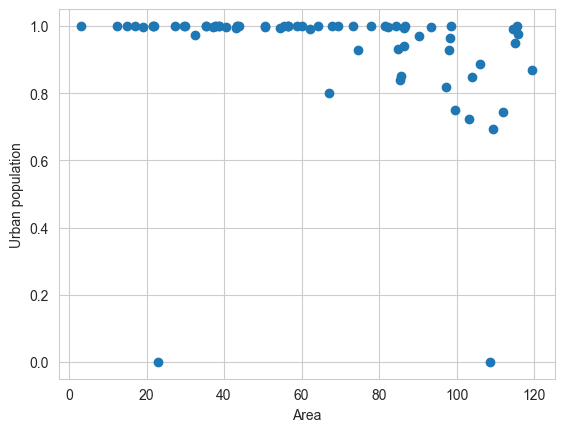

In [212]:
plt.scatter(df_temp["Area"], df_temp["Urban Population"])
plt.xlabel("Area")
plt.ylabel("Urban population")
plt.show()

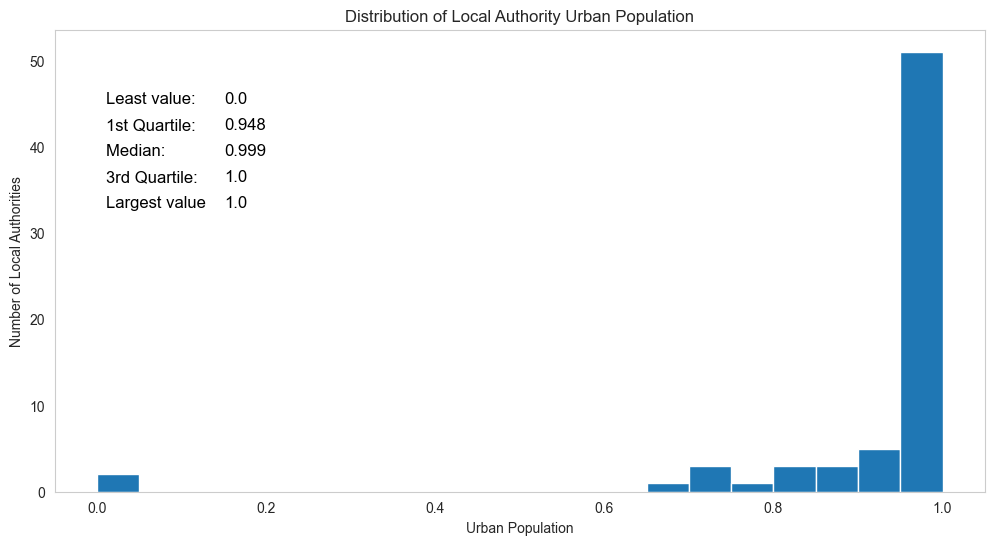

In [214]:
fig = plt.figure(1, figsize=(12, 6))
ax = fig.add_subplot(111)

ax.hist(df_temp["Urban Population"], bins=20)
ax.set_xlabel("Urban Population")
ax.set_ylabel("Number of Local Authorities")
ax.set_title("Distribution of Local Authority Urban Population")

quantiles = np.quantile(df_temp["Urban Population"], np.array([0.00, 0.25, 0.50, 0.75, 1.00]))
ax.vlines(quantiles, [0] * quantiles.size, [1] * quantiles.size,
          color='b', ls=':', lw=0.5, zorder=0)

ax.text(0.01, 45, "Least value: ", {'color': '00', 'fontsize': 12})
ax.text(0.15, 45, round(quantiles[0],3), {'color': '00', 'fontsize': 12})
ax.text(0.01, 42, "1st Quartile: ", {'color': '00', 'fontsize': 12})
ax.text(0.15, 42, round(quantiles[1],3), {'color': '00', 'fontsize': 12})
ax.text(0.01, 39, "Median: ", {'color': '00', 'fontsize': 12})
ax.text(0.15, 39, round(quantiles[2], 3), {'color': '00', 'fontsize': 12})
ax.text(0.01, 36, "3rd Quartile: ", {'color': '00', 'fontsize': 12})
ax.text(0.15, 36, round(quantiles[3],3), {'color': '00', 'fontsize': 12})
ax.text(0.01, 33, "Largest value ", {'color': '00', 'fontsize': 12})
ax.text(0.15, 33, round(quantiles[4],3), {'color': '00', 'fontsize': 12})

ax.grid(False)
plt.show()

In [44]:
df_temp.index

Index(['W06000019', 'E06000053', 'E06000036', 'E08000008', 'W06000024',
       'E08000002', 'E08000023', 'E08000006', 'E06000043', 'E08000030',
       'E08000028', 'E06000027', 'E08000009', 'E08000027', 'E06000018',
       'E08000022', 'E09000008', 'E08000021'],
      dtype='object', name='LA Code')